In [12]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.optimize import curve_fit
mpl.rcParams['figure.dpi'] = 175
h = 6.6260755e-27 # Planck's constant [erg] [s]
q = 4.803e-10 # electron charge

def eV_e(gamma):
    return (gamma*9.109e-31*2.998e8**2) / 1.602e-19

def gamma_e(eV):
    return eV / 511000

def eV_p(freq):
    return 4.1357e-13*freq

In [13]:
def power_law(gamma, power, A):
    return A * gamma ** (power)

def fit_4th_order(x, y, zorder=0):
    # Fit a 4th order polynomial to the data
    coefficients = np.polyfit(np.log10(x), np.log10(y), 4)
    poly = np.poly1d(coefficients)
    print(np.poly1d(coefficients))
    # Calculate fitted values and errors
    x_fit = np.linspace(min(x), max(x), 100)
    log_y_fit = poly(np.log10(x_fit))
    y_fit = 10**log_y_fit
    # Calculate errors (simplified estimate)
    residuals = np.log10(y) - poly(np.log10(x))
    std_dev = np.std(residuals)
    error_margin = std_dev
    y_fit_lower = 10**(log_y_fit - error_margin)
    y_fit_upper = 10**(log_y_fit + error_margin)
    # Plot the fit and error bands
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='tab:blue', alpha=0.5, label="4th order polynomial fit", zorder=zorder)


# IMPLICIT STEP

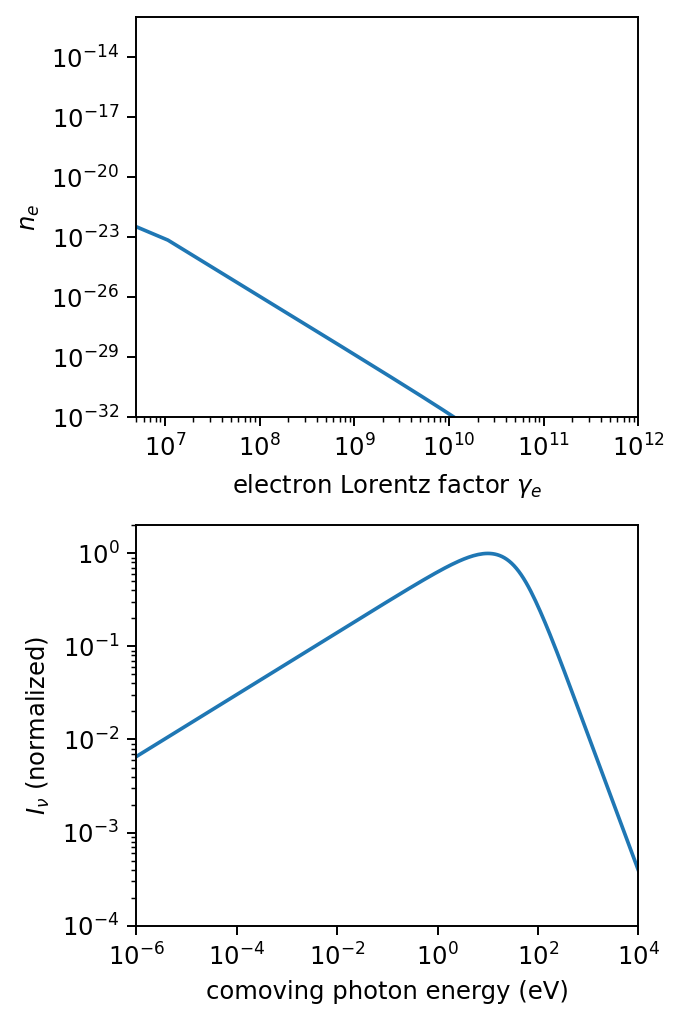

In [ ]:
# Example code

sim_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\simulation_data.csv")

fig, ax = plt.subplots(2, 1, figsize = (4, 6))

# plot the electron population
ax[0].loglog(eV_e(sim_data["gamma"][1:-1]), sim_data["iter final"][1:-1])
ax[0].set_xlabel(r"electron Lorentz factor $\gamma_e$")
ax[0].set_ylabel("$n_e$")
ax[0].set_xlim(5e6, 1e12)
ax[0].set_ylim(1e-32, 1e-12)    

# plot the resulting photon population
ax[1].loglog(eV_p(sim_data["photon_freq"][1:-1]), sim_data["photon_n"][1:-1])
ax[1].set_xlabel(r"comoving photon energy (eV)")
ax[1].set_ylabel("$I_{\\nu}$ (normalized)")
ax[1].set_xlim(1e-6, 1e4)
ax[1].set_ylim(1e-4, 2e0)
plt.tight_layout()

# show
plt.draw()
plt.show()

Text(0.5, 0, 'Lorentz factor')

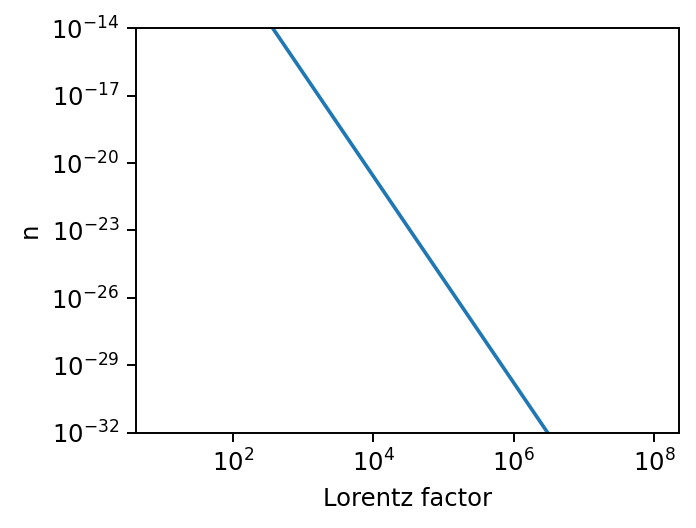

In [24]:
plt.figure(figsize=[4,3])
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\implicit_solve\simulation_data.csv")
plt.plot(sim_data["gamma"], sim_data["electron_n"])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-32,1e-14)
#plt.xlim(1e1, 1e8)
plt.xlabel("Lorentz factor")

-1.4938107154179157
-1.5
-1.9722812177860711
-2.0
-2.4387420825282544
-2.5
-2.8930091451949767
-3.0
-4.599858877089243
-4.9999992


(1e-14, 1e-09)

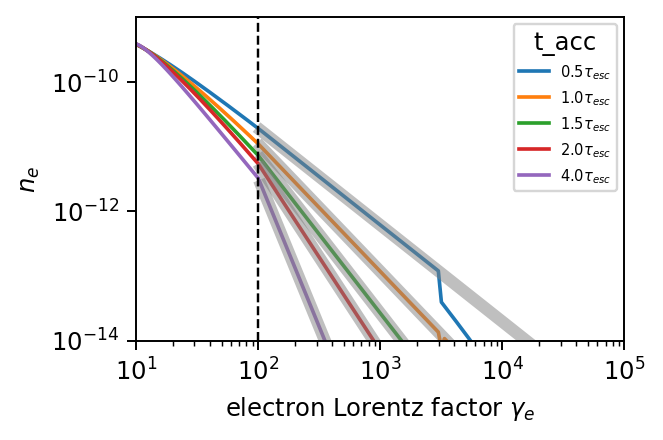

In [ ]:
t_esc_multiple = ["0.5","1.0","1.5","2.0","4.0"]
plt.figure(figsize=[3*1.2,2*1.2])
for multiple in t_esc_multiple:
    sim_data = pd.read_csv(fr"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\t_acc={multiple}_t_esc.csv")
    run_data = pd.read_csv(fr"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_t_acc={multiple}_t_esc.csv",index_col=False)

    sim_data = sim_data[sim_data["electron_n"] > 1e-20]
    plt.loglog(sim_data["gamma"], sim_data["electron_n"], label ="{}".format(round(run_data["tau_acc"][0]/run_data["tau_esc"][0], 1)) + "$\\tau_{esc}$")
    x = sim_data["gamma"][sim_data["gamma"] > run_data["inject_min"][0] * 10]
    y = sim_data["electron_n"][sim_data["gamma"] > run_data["inject_min"][0] * 10]

    p, A, param = fit_power_law(x,y)
    print(p)
    print(-round((1 + run_data["tau_acc"][0] / run_data["tau_esc"][0]),7))
    plt.plot(x, power_law(x,p,A), "grey", alpha=0.5, lw=5,) #label = f"p = {round(p, 3)}")

plt.vlines(run_data["inject_max"][0], 1e-14, 1e-9,"black", "dashed", lw=1)
plt.legend(title = "t_acc", fontsize=6)
plt.xlabel(r"electron Lorentz factor $\gamma_e$")
plt.ylabel("$n_e$")
plt.xlim(1e1, 1e5)
plt.ylim(1e-14,1e-9)


B = 0.1
B = 0.25
B = 0.5
B = 1.0
B = 1.5
B = 2.0


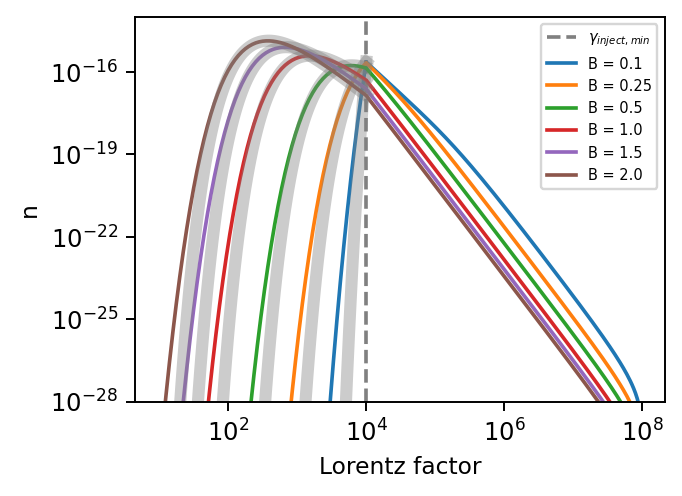

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define your cooling_LHS function with fixed tau and S
def cooling_LHS(gamma, C, tau=1, S=1):  # Example values for tau and S
    return C * np.exp(1)**(1 / (S * tau * gamma)) / gamma ** 2

def plot_with_fit(files, names, fontsize=10, x_range=[1e1, 1e5], y_range=[1e-28, 1e-14], plot_initial=False, folder="csv_data", lnn_bool=False):
    colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
               "tab:brown", "tab:pink","tab:grey", "tab:olive", "tab:cyan"]
    plt.figure(figsize=[4, 3])
    plt.vlines(1e4, 1e-28, 2e12, "grey", "dashed", lw=1.5, label="$\gamma_{inject,min}$")

    for file, name, colour in zip(files, names, colours[:len(files)]):
        print(name)
        run_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\{}\runs\run_{}.csv".format(folder,file[:-4]))
        sim_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\{}\{}".format(folder,file), header=None, low_memory=False)
        
        sim_data = sim_data.T
        sim_data.columns = sim_data.iloc[0]
        sim_data = sim_data[1:]
        sim_data.reset_index(drop=True, inplace=True)
        plot_y = sim_data.iloc[:, -1]
        if lnn_bool:
            plot_y = np.exp(1.)**plot_y
        plt.plot(sim_data["gamma"], plot_y, label=name, c = colour)

        # Define cooling_LHS with run_data params
        def cooling_LHS(gamma, C, tau=run_data["tau_esc"].values[0], S=run_data["S"].values[0]):
            return C * np.exp(1)**(1 / (S * tau * gamma)) / gamma ** 2

        # Example data
        sim_data = sim_data.fillna(0)

        sim_data = sim_data[sim_data.iloc[:, -1] != 0]
        gamma_data = sim_data["gamma"][sim_data["gamma"] <= run_data["inject_min"].values[0]]
        cooling_data = sim_data.iloc[:, -1][sim_data["gamma"] <= run_data["inject_min"].values[0]]

        if lnn_bool:
            cooling_data = np.exp(1.)**cooling_data
        # Fit the model to the data
        initial_guess = [1]

        popt, pcov = curve_fit(cooling_LHS, gamma_data, cooling_data, p0=initial_guess)
        
        # Optimal parameter
        C_opt = popt[0]
        
        # Generate fitted values
        cooling_fit = cooling_LHS(gamma_data, C_opt)
        
        # Plot the data and the fit
        plt.plot(gamma_data, cooling_fit, c="grey", alpha=0.4, ls="-", lw=5)
    
    if plot_initial:
        plot_y = sim_data.iloc[:, 1]
        if lnn_bool:
            plot_y = np.exp(1.)**plot_y
        plt.plot(sim_data["gamma"], plot_y, "-", c = "black", zorder=0, label="init_dist")
    
    # Add labels and legend with optional fontsize
    plt.ylabel("n", fontsize=fontsize*0.8)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Lorentz factor", fontsize=fontsize*0.8)
    plt.xlim(*x_range)
    plt.ylim(*y_range)
    plt.legend(fontsize=fontsize*0.5)
    #plt.grid(which="minor")
    plt.tight_layout()
    plt.show()

# Example usage with optional fontsize
files = ["B 100.csv", "B 250.csv", "B 500.csv", "B1000.csv", "B1500.csv", "B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plot_with_fit(files, names, fontsize=12, lnn_bool=False, x_range=[None, None])

          4           3          2
0.001626 x - 0.06817 x - 0.3657 x - 0.9815 x + 7.416


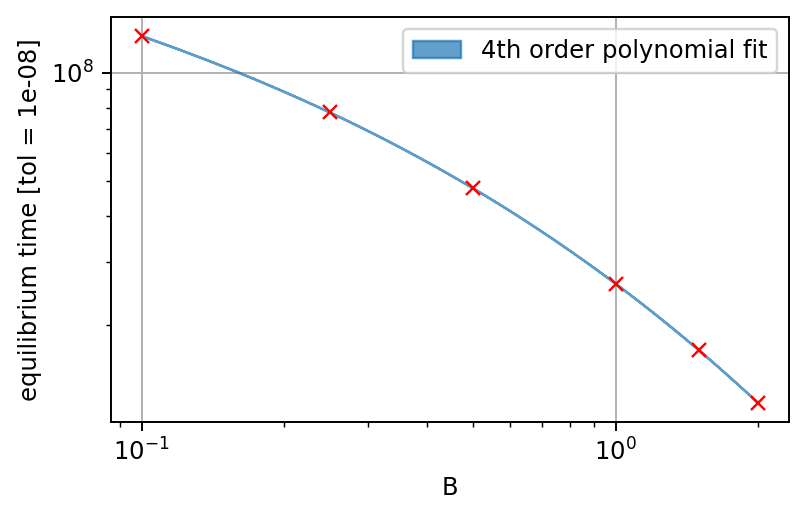

In [113]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]

# Define your model function
def model(x, a, b):
    return a * x**b

x=[]
y=[]
plt.figure(figsize=[5,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\runs\run_{}".format(file))
    x.append(sim_data["B"][0])
    y.append(sim_data["final_time"][0])
x=np.array(x)
y=np.array(y)
y = y
plt.plot(x, y, "rx", zorder=3)

# Fit a 4th order polynomial to the data
coefficients = np.polyfit(np.log10(x), np.log10(y), 4)
poly = np.poly1d(coefficients)
print(np.poly1d(coefficients))
# Calculate fitted values and errors
x_fit = np.linspace(min(x), max(x), 100)
log_y_fit = poly(np.log10(x_fit))
y_fit = 10**log_y_fit
# Calculate errors (simplified estimate)
residuals = np.log10(y) - poly(np.log10(x))
std_dev = np.std(residuals)
error_margin = std_dev
y_fit_lower = 10**(log_y_fit - error_margin)
y_fit_upper = 10**(log_y_fit + error_margin)
# Plot the fit and error bands
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='tab:blue', alpha=0.7, label="4th order polynomial fit", zorder=2)


plt.ylabel(f"equilibrium time [tol = {sim_data['end_tol'][0]}]")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("B")
plt.legend()
#plt.tight_layout()
plt.grid(which="major", alpha=0.99)

          4           3          2
0.004314 x - 0.05191 x + 0.1728 x + 0.5146 x + 6.202


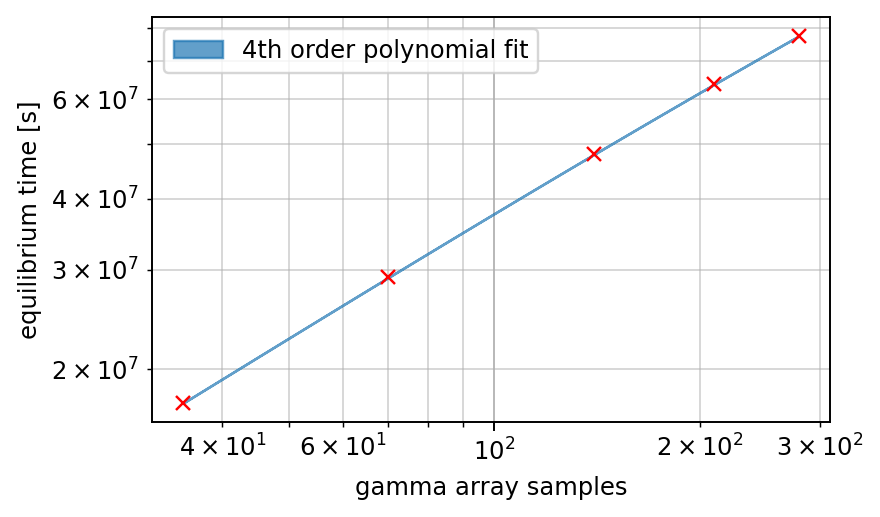

In [114]:
files = ["samples_pd5.csv","samples_pd10.csv","samples_pd20.csv","samples_pd30.csv","samples_pd40.csv"]
names = ["spd = 5", "spd = 10", "spd = 20", "spd = 30", "spd = 40"]

# Define your model function
def model(x, a, b):
    return a * x**b

x=[]
y=[]
plt.figure(figsize=[5,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\runs\run_{}".format(file))
    x.append(sim_data["array_len"][0])
    y.append(sim_data["final_time"][0])
x=np.array(x)
y=np.array(y)
y = y
plt.plot(x, y, "rx", zorder=3)

# Fit a 4th order polynomial to the data
coefficients = np.polyfit(np.log10(x), np.log10(y), 4)
poly = np.poly1d(coefficients)
print(np.poly1d(coefficients))
# Calculate fitted values and errors
x_fit = np.linspace(min(x), max(x), 100)
log_y_fit = poly(np.log10(x_fit))
y_fit = 10**log_y_fit
# Calculate errors (simplified estimate)
residuals = np.log10(y) - poly(np.log10(x))
std_dev = np.std(residuals)
error_margin = std_dev
y_fit_lower = 10**(log_y_fit - error_margin)
y_fit_upper = 10**(log_y_fit + error_margin)
# Plot the fit and error bands
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='tab:blue', alpha=0.7, label="4th order polynomial fit", zorder=2)


plt.ylabel(f"equilibrium time [s]")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("gamma array samples")
plt.legend()
#plt.tight_layout()
plt.grid(which="major", alpha=0.9)
plt.grid(which="minor", alpha=0.5)

           4           3          2
-0.002829 x + 0.09736 x - 0.9045 x + 3.313 x + 2.698


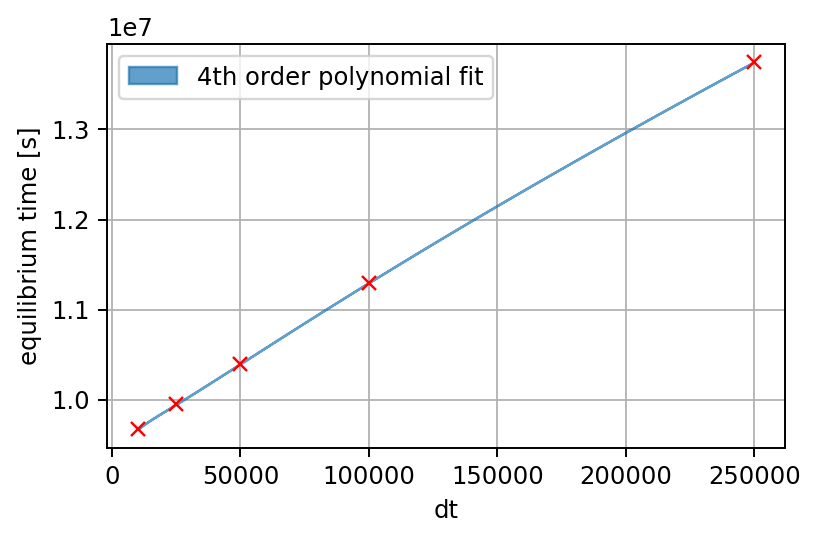

In [112]:
dts = [10000,25000,50000,100000,250000]
files = [f"dt{dt}.csv" for dt in dts]
names = [f"dt = {dt}" for dt in dts]

# Define your model function
def model(x, a, b):
    return a * x**b

x=[]
y=[]
plt.figure(figsize=[5,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\runs\run_{}".format(file))
    x.append(sim_data["dt"][0])
    y.append(sim_data["final_time"][0])
x=np.array(x)
y=np.array(y)
y = y
plt.plot(x, y, "rx", zorder=3)

# Fit a 4th order polynomial to the data
coefficients = np.polyfit(np.log10(x), np.log10(y), 4)
poly = np.poly1d(coefficients)
print(np.poly1d(coefficients))
# Calculate fitted values and errors
x_fit = np.linspace(min(x), max(x), 100)
log_y_fit = poly(np.log10(x_fit))
y_fit = 10**log_y_fit
# Calculate errors (simplified estimate)
residuals = np.log10(y) - poly(np.log10(x))
std_dev = np.std(residuals)
error_margin = std_dev
y_fit_lower = 10**(log_y_fit - error_margin)
y_fit_upper = 10**(log_y_fit + error_margin)
# Plot the fit and error bands
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='tab:blue', alpha=0.7, label="4th order polynomial fit", zorder=2)


plt.ylabel(f"equilibrium time [s]")
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel("dt")
plt.legend()
#plt.tight_layout()
plt.grid(which="major", alpha=0.9)
plt.grid(which="minor", alpha=0.5)

ValueError: array must not contain infs or NaNs

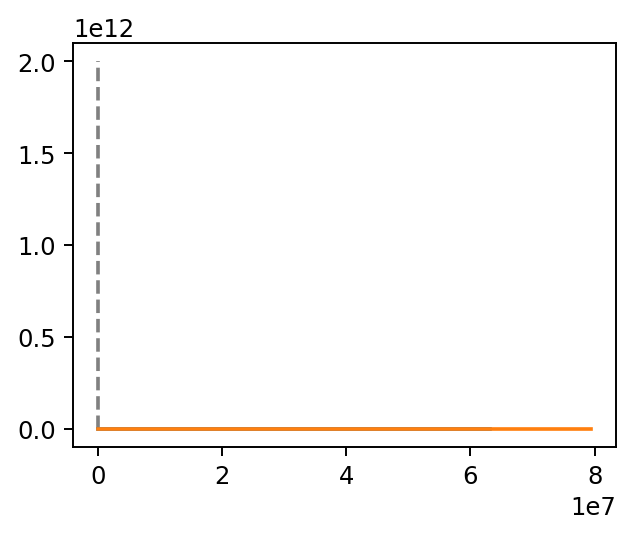

In [101]:
# Example usage with optional fontsize
spds = [5,10,20,40,80,120]
files = [f"samples_pd{spd}.csv" for spd in spds]
names = [f"samples per dec{spd}" for spd in spds]
plot_with_fit(files, names, fontsize=12, x_range=[1e1, 1e8])

B = 0.1
B = 2.0


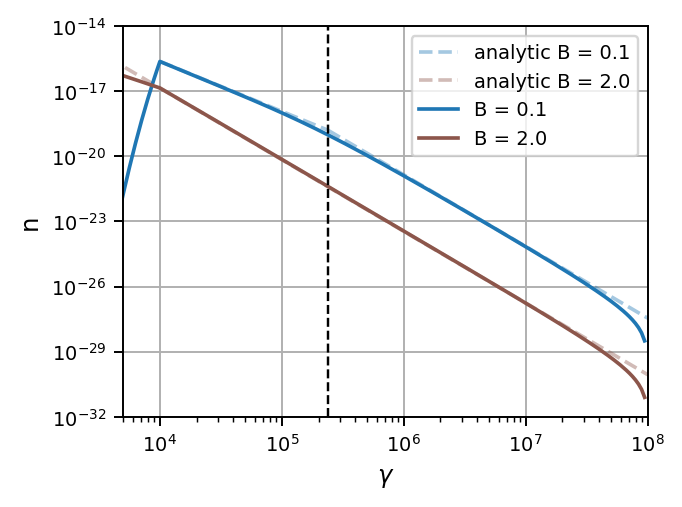

In [92]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))
gamma_inject = 1e4

fs=10

plt.figure(figsize=[4,3])
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
)

gamma = sim_data[sim_data["gamma"] <= gamma_c]
gamma = gamma["gamma"][gamma["gamma"] >= gamma_inject]
plt.plot(gamma, 
         power_law(gamma, -inject_p, C * tau),
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"][sim_data["gamma"] >= gamma_c]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)

S=-5.169027e-09
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[1],
         alpha=0.4, 
         ls="--",
)
gamma = sim_data["gamma"]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 1e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


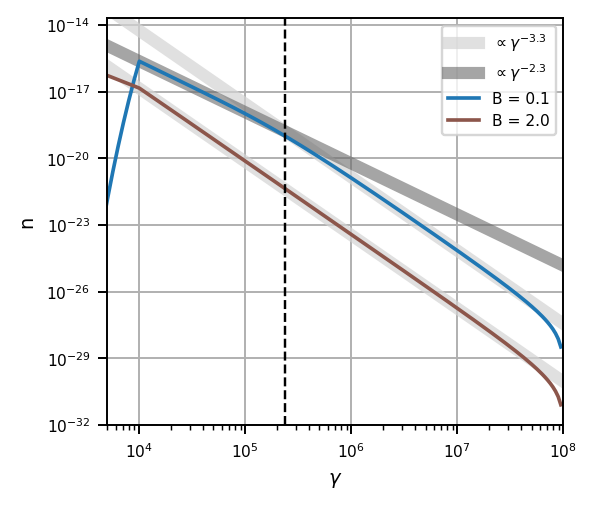

In [197]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=8
lw = 5

plt.figure(figsize=[3.5,3])
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p-1}}}$" 
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p, C * tau), 
         c = "dimgrey",
         alpha=0.6, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p}}}$" 
)  

S=-5.169027e-09

plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 2e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


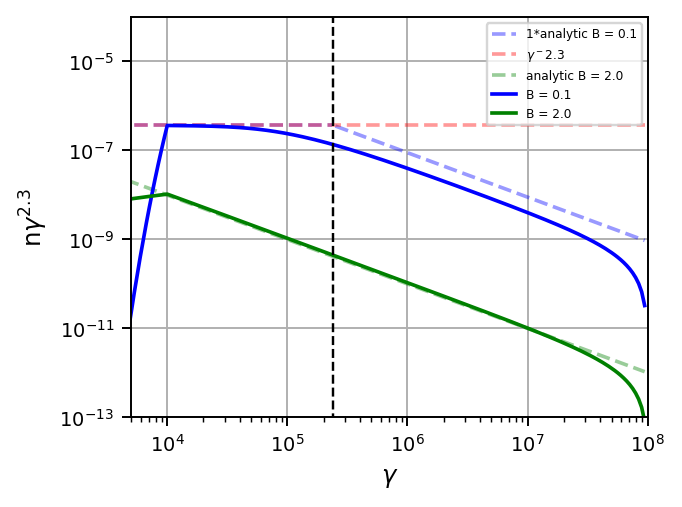

In [21]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["blue", "green"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=10

plt.figure(figsize=[4,3])
plt.plot(sim_data["gamma"][sim_data["gamma"] < gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] < gamma_c], -inject_p, C * tau) * sim_data["gamma"][sim_data["gamma"] < gamma_c]**2.3, 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"{A}*analytic B = 0.1"
)
plt.plot(sim_data["gamma"][sim_data["gamma"] > gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] > gamma_c], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"][sim_data["gamma"] > gamma_c]**2.3, 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -2.3, C * tau)* sim_data["gamma"]**2.3, 
         c= "red", 
         alpha=0.4, 
         ls="--",
         label=f"$\gamma^{-2.3}$"
)


S=-1.16e-08

plt.plot(sim_data["gamma"], 
         A*power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"]**2.3, 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1] * sim_data["gamma"]**2.3, label=name, c=colour)
    print(name)
plt.ylabel("n$\gamma^{2.3}$", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.5)
plt.xlim(5e3, 1e8)
plt.ylim(1e-13, 1e-4)
plt.vlines(gamma_c, 1e-14, 1, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

# LOG STEP

Text(0.5, 0, 'Lorentz factor')

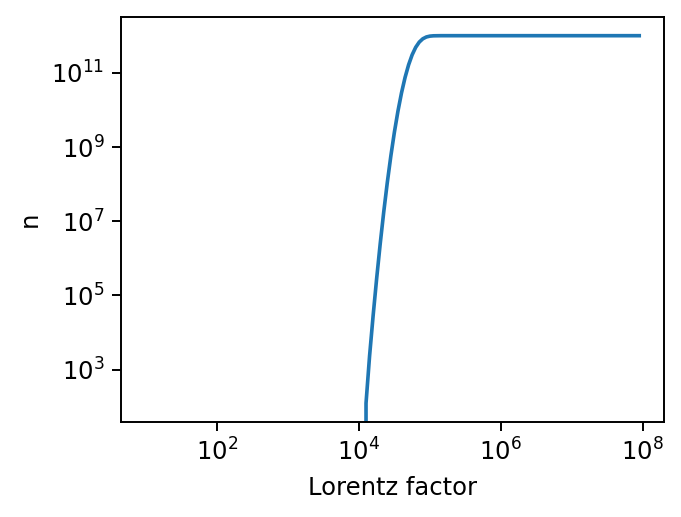

In [143]:
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\log_step_simulation_data.csv",
header=None,
low_memory=False,
)
plt.figure(figsize=[4,3])
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
#plt.ylim(1e-28)
#plt.xlim(1e1, 1e5)
plt.xlabel("Lorentz factor")

# STEADY STATE

Text(0.5, 0, 'Lorentz factor')

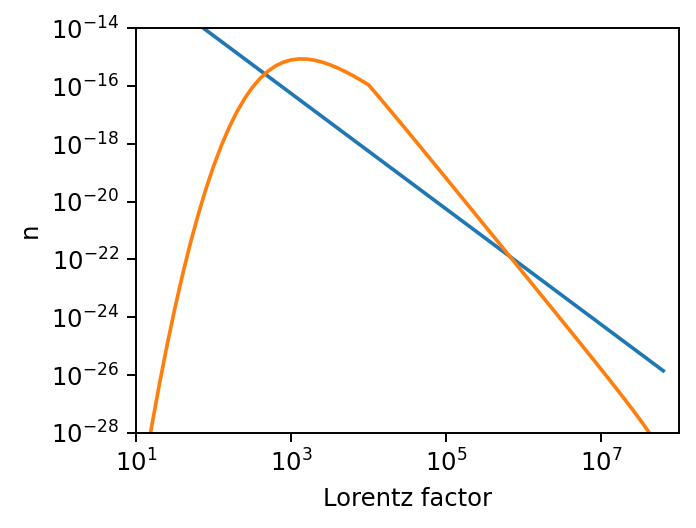

In [126]:
# Set display options for precision
pd.set_option('display.float_format', '{:.10e}'.format)

# Example code
plt.figure(figsize=[4, 3])
sim_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\B1000.csv")

#print(sim_data.to_string())
plt.plot(sim_data["gamma"], sim_data["0"])
plt.plot(sim_data["gamma"], sim_data.iloc[:,2])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-28, 1e-14)
plt.xlim(1e1, 1e8)
plt.xlabel("Lorentz factor")

B = 0.1
B = 0.25
B = 0.5
B = 1.0
B = 1.5
B = 2.0


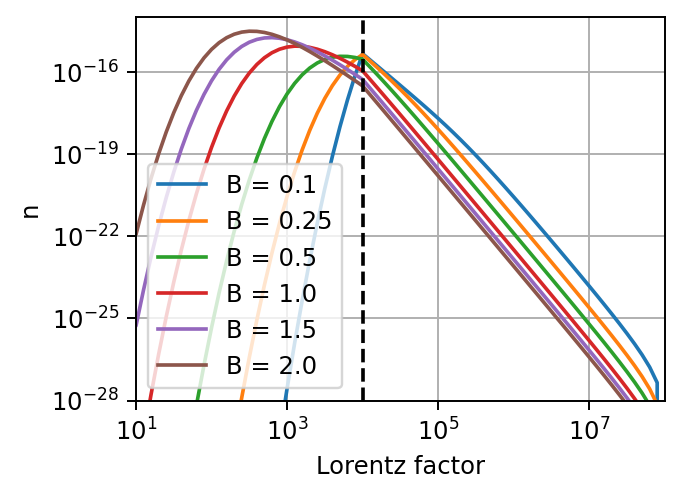

In [156]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),)
    plt.plot(sim_data["gamma"], sim_data.iloc[:,2], label=name)
    print(name)
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Lorentz factor")
plt.xlim(1e1,1e8)
plt.ylim(1e-28,1e-14)
plt.vlines(1e4, 1e-28, 1e-7, "black", "dashed")
plt.legend()
plt.tight_layout()
plt.grid()

B = 0.1
B = 0.25
B = 0.5
B = 1.0
B = 1.5
B = 2.0


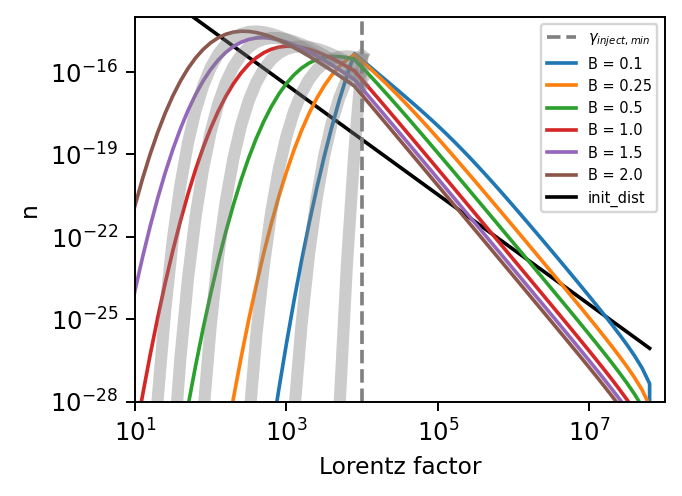

In [116]:
# Example usage with optional fontsize
files = ["B 100.csv", "B 250.csv", "B 500.csv", 
         "B1000.csv", "B1500.csv", "B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plot_with_fit(files, names, fontsize=12, plot_initial=True,x_range=[1e1, 1e8], 
              folder="csv_data\steady_state", lnn_bool=False)

B = 0.1


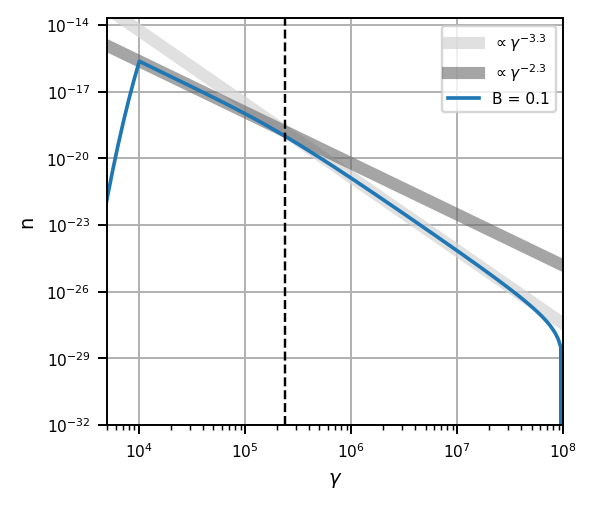

In [15]:
files = ["simulation_data.csv"]
names = ["B = 0.1"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.292257e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=8
lw = 5


plt.figure(figsize=[3.5,3])
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p-1}}}$" 
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p, C * tau), 
         c = "dimgrey",
         alpha=0.6, 
         ls="-",
         lw=lw,
         label=f"$\propto\gamma^{{{-inject_p}}}$" 
)  

"""S=-5.169027e-09

plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= "lightgrey", 
         alpha=0.7, 
         ls="-",
         lw=lw,
)"""

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file))

    plt.plot(sim_data["gamma"], sim_data["iter final"], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 2e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


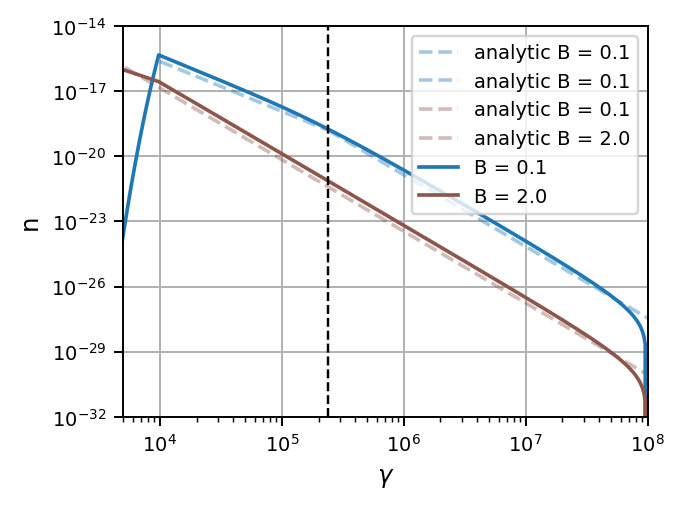

In [80]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["tab:blue", "tab:brown"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))
gamma_inject = 1e4

fs=10

plt.figure(figsize=[4,3])
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)

gamma = sim_data[sim_data["gamma"] <= gamma_c]
gamma = gamma["gamma"][gamma["gamma"] >= gamma_inject]
plt.plot(gamma, 
         power_law(gamma, -inject_p, C * tau), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"][sim_data["gamma"] >= gamma_c]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)

S=-5.169027e-09
gamma = sim_data["gamma"][sim_data["gamma"] <= gamma_inject]
plt.plot(gamma, 
         cooling_LHS(gamma, tau, S, C), 
         c = colours[1],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
gamma = sim_data["gamma"]
plt.plot(gamma, 
         power_law(gamma, -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.8)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 1e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

# PHOTON POPULATION

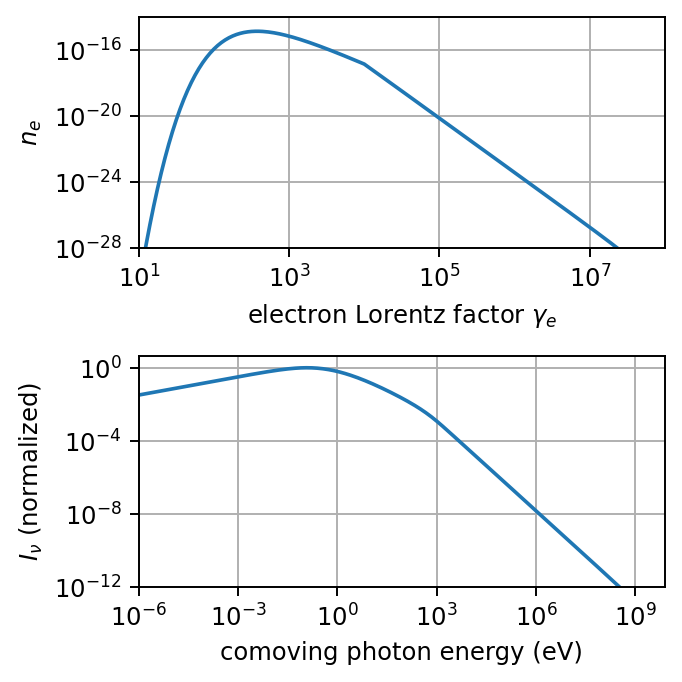

In [25]:
# Example code

sim_data = pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\simulation_data.csv")

fig, ax = plt.subplots(2, 1, figsize = (4, 4))

# plot the electron population
ax[0].loglog(sim_data["gamma"][1:-1], sim_data["iter final"][1:-1])
ax[0].set_xlabel(r"electron Lorentz factor $\gamma_e$")
ax[0].set_ylabel("$n_e$")
ax[0].set_xlim(1e1, 1e8)
ax[0].set_ylim(1e-28, 1e-14)    

# plot the resulting photon population
ax[1].loglog(eV_p(sim_data["photon_freq"][1:-1]), sim_data["photon_n"][1:-1])
ax[1].set_xlabel(r"comoving photon energy (eV)")
ax[1].set_ylabel("$I_{\\nu}$ (normalized)")
ax[1].set_xlim(1e-6, )
ax[1].set_ylim(1e-12, )
plt.tight_layout()
ax[0].grid()
ax[1].grid()
# show
plt.draw()
plt.show()

KeyError: 'iter 1'

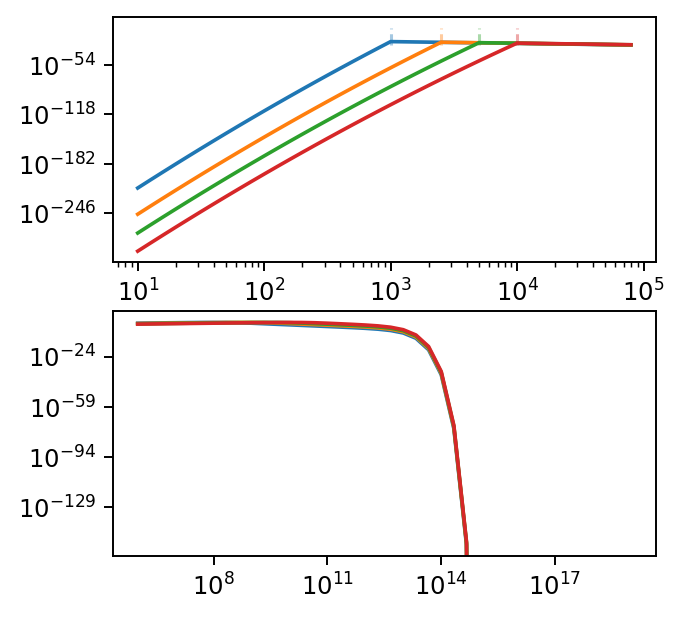

In [290]:
colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
            "tab:brown", "tab:pink","tab:grey", "tab:olive", "tab:cyan"]

mins = [1000,2500,5000,10000,25000,50000]
files = [f"inject_min{minimum}.csv" for minimum in mins]
names = [f"{minimum}" for minimum in mins]

fig, ax = plt.subplots(2, 1, figsize = (4, 4))
for file, name, colour in zip(files,names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),)
    run_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_{}".format(file))
    # plot the electron population
    ax[0].loglog(sim_data["gamma"][1:-1], sim_data["iter 1"][1:-1], label=name, c=colour)
    ax[0].vlines(run_data["inject_min"][0], 1e-28, 1e-7, colour, "dashed", lw=1.25, alpha=0.4)
    
    # plot the resulting photon population
    ax[1].loglog(sim_data["photon_freq"][1:-1], sim_data["photon_n"][1:-1], label=name, c=colour)

ax[0].set_xlabel(r"electron Lorentz factor $\gamma_e$")
ax[0].set_ylabel("$n_e$")
ax[0].set_xlim(5e0, 2e9)
ax[0].set_ylim(1e-28, 1e-13)
ax[0].legend(title="$\gamma_{inject}$",loc="upper right", frameon=False, fontsize=6, title_fontsize=6)

ax[1].set_xlabel(r"co-moving frequency $\nu$ (Hz)")
ax[1].set_ylabel("$I_{\\nu}$ (normalized)")
#ax[1].set_xlim(1e5,1e23)
ax[1].set_ylim(1e-12, 10)

plt.tight_layout()
plt.show()

peak_freq = []
B = []
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file))
    run_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_{}".format(file))
    peak_freq.append(sim_data["photon_freq"].loc[sim_data["photon_n"] == 1].values[0])
    B.append(run_data["inject_min"][0])

plt.plot(B, peak_freq, "rx")

x=B
y=peak_freq
# Fit a 4th order polynomial to the data
fit_4th_order(x, y)
plt.xlabel("inject min")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("peak frequency")
#plt.xlim(1e5, 5e23)
#plt.ylim(1e-12,None)
plt.legend()
plt.tight_layout()
plt.grid()

        4       3         2
-2.041 x - 1.7 x - 1.403 x - 2.727 x + 12.27


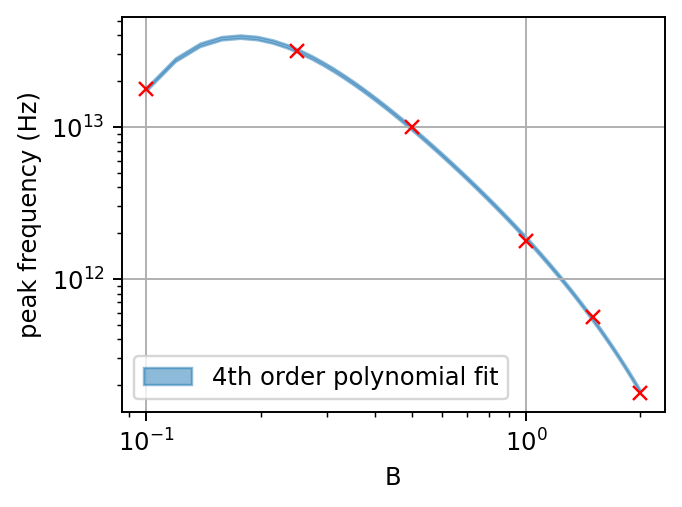

In [236]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
peak_freq = []
B = []
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file))
    run_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_{}".format(file))
    peak_freq.append(sim_data["photon_freq"].loc[sim_data["photon_n"] == 1].values[0])
    B.append(run_data["B"][0])

plt.plot(B, peak_freq, "rx")

x=B
y=peak_freq
# Fit a 4th order polynomial to the data
fit_4th_order(x, y)
plt.xlabel("B")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("peak frequency (Hz)")
#plt.xlim(1e5, 5e23)
#plt.ylim(1e-12,None)
plt.legend()
plt.tight_layout()
plt.grid()

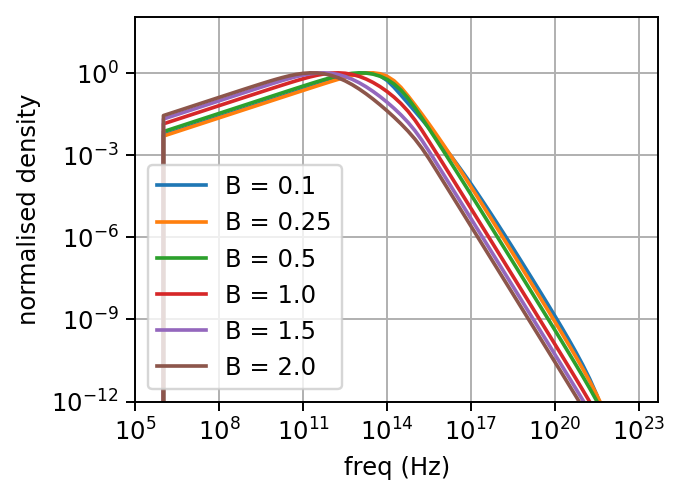

In [235]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
peak_freq = []
B = []
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file))
    plt.plot(sim_data["photon_freq"], sim_data["photon_n"], label = name)
plt.ylabel("normalised density")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("freq (Hz)")
plt.xlim(1e5, 5e23)
plt.ylim(1e-12,None)
plt.legend()
plt.tight_layout()
plt.grid()

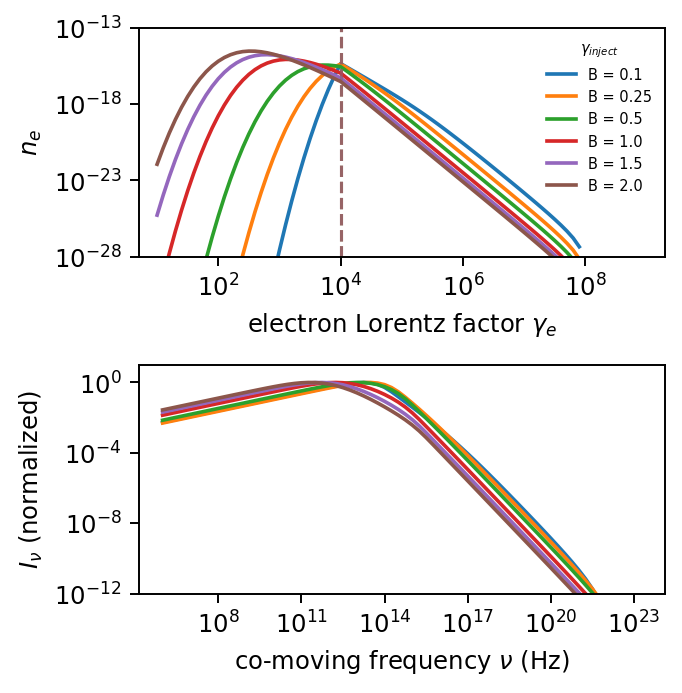

        4       3         2
-2.041 x - 1.7 x - 1.403 x - 2.727 x + 12.27


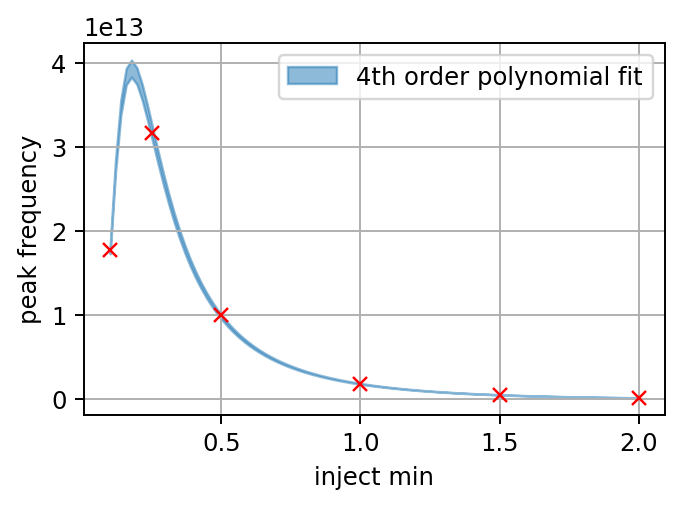

In [242]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]

fig, ax = plt.subplots(2, 1, figsize = (4, 4))
for file, name, colour in zip(files,names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file),)
    run_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_{}".format(file))
    # plot the electron population
    ax[0].loglog(sim_data["gamma"][1:-1], sim_data["iter 1"][1:-1], label=name, c=colour)
    ax[0].vlines(run_data["inject_min"][0], 1e-28, 1e-7, colour, "dashed", lw=1.25, alpha=0.4)
    
    # plot the resulting photon population
    ax[1].loglog(sim_data["photon_freq"][1:-1], sim_data["photon_n"][1:-1], label=name, c=colour)

ax[0].set_xlabel(r"electron Lorentz factor $\gamma_e$")
ax[0].set_ylabel("$n_e$")
ax[0].set_xlim(5e0, 2e9)
ax[0].set_ylim(1e-28, 1e-13)
ax[0].legend(title="$\gamma_{inject}$",loc="upper right", frameon=False, fontsize=6, title_fontsize=6)

ax[1].set_xlabel(r"co-moving frequency $\nu$ (Hz)")
ax[1].set_ylabel("$I_{\\nu}$ (normalized)")
#ax[1].set_xlim(1e5,1e23)
ax[1].set_ylim(1e-12, 10)

plt.tight_layout()
plt.show()

peak_freq = []
B = []
plt.figure(figsize=[4,3])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\{}".format(file))
    run_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\steady_state\runs\run_{}".format(file))
    peak_freq.append(sim_data["photon_freq"].loc[sim_data["photon_n"] == 1].values[0])
    B.append(run_data["B"][0])

plt.plot(B, peak_freq, "rx")

x=B
y=peak_freq
# Fit a 4th order polynomial to the data
fit_4th_order(x, y)
plt.xlabel("inject min")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("peak frequency")
#plt.xlim(1e5, 5e23)
#plt.ylim(1e-12,None)
plt.legend()
plt.tight_layout()
plt.grid()